In [80]:
import json
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [81]:
def get_data_and_do_everything(hashtag):
    dictionary = {'#GoHawks' : ['tweets_#gohawks.txt', 188136],
                    '#GoPatriots' : ['tweets_#gopatriots.txt', 26232],
                    '#NFL' : ['tweets_#nfl.txt', 259024],
                    '#Patriots' : ['tweets_#patriots.txt', 489713],
                    '#SB49' : ['tweets_#sb49.txt', 826951],
                    '#SuperBowl' : ['tweets_#superbowl.txt', 1348767]}
    
    time_stamp = np.zeros(dictionary[hashtag][1])
    tweets = [0]*dictionary[hashtag][1]
    followers_by_user = np.zeros(dictionary[hashtag][1])
    retweeted = [False] * dictionary[hashtag][1]
    user_mentions = np.zeros(dictionary[hashtag][1])
    hashtags_in_tweet = np.zeros(dictionary[hashtag][1])
    reply = [False] * dictionary[hashtag][1]
    favorite_count = np.zeros(dictionary[hashtag][1])
    verified = [False] * dictionary[hashtag][1]
    number_of_citations = np.zeros(dictionary[hashtag][1])
    ranking_scores = np.zeros(dictionary[hashtag][1])
    
    file = open('./tweet_data/'+dictionary[hashtag][0])
    for (line, index) in zip(file, range(0, dictionary[hashtag][1])):
        data = json.loads(line)
        time_stamp[index] = data['firstpost_date']
        tweets[index] = data['tweet']['text']
        followers_by_user[index] = data['author']['followers']
        author_name = data['author']['nick']
        original_author_name = data['original_author']['nick']
        if original_author_name != author_name:
            retweeted[index] = True
        user_mentions[index] = len(data['tweet']['entities']['user_mentions'])
        hashtags_in_tweet[index] = data['title'].count('#')
        if data['tweet']['in_reply_to_status_id'] != 'null':
            reply[index] = True
        favorite_count[index] = data['tweet']['favorite_count']
        if data['tweet']['user']['verified'] != 'False':
            verified[index] = True
        number_of_citations[index] = len(data['tweet']['entities']['urls'])
        ranking_scores[index] = data['metrics']['ranking_score']
    file.close()
    
    five_day_index = []
    for i in range(dictionary[hashtag][1]):
        if time_stamp[i] > 1422604800 and time_stamp[i] < 1422950400:
            five_day_index.append(i)
    five_day_tweets = []
    five_day_timestamp = []
    five_day_followers_by_user = []
    five_day_retweet = []
    five_day_user_mentions = []
    five_day_hashtags_in_tweet = []
    five_day_reply = []
    five_day_favorite_count = []
    five_day_verified = []
    five_day_number_of_citations = []
    five_day_ranking_scores = []
    for j in five_day_index:
        five_day_tweets.append(tweets[j])
        five_day_timestamp.append(time_stamp[j])
        five_day_followers_by_user.append(followers_by_user[j])
        five_day_retweet.append(retweeted[j])
        five_day_hashtags_in_tweet.append(hashtags_in_tweet[j])
        five_day_reply.append(reply[j])
        five_day_favorite_count.append(favorite_count[j])
        five_day_verified.append(verified[j])
        five_day_number_of_citations.append(number_of_citations[j])
        five_day_ranking_scores.append(ranking_scores[j])
        five_day_user_mentions.append(user_mentions[j])
    #calculations(dictionary, hashtag, time_stamp, tweets, followers_by_user, retweeted, user_mentions, hashtags_in_tweet, reply, favorite_count, verified, number_of_citations, ranking_scores)
    calculations_5_day(hashtag, five_day_tweets, five_day_timestamp, five_day_followers_by_user, five_day_retweet, five_day_user_mentions, five_day_hashtags_in_tweet, five_day_reply, five_day_favorite_count, five_day_verified, five_day_number_of_citations, five_day_ranking_scores) 

In [82]:
from string import punctuation
def strip_punctuation(s):
    return ''.join(c for c in s if c not in punctuation)

In [97]:
def calculations_5_day(hashtag, five_day_tweets, five_day_timestamp, five_day_followers_by_user, five_day_retweet, five_day_user_mentions, five_day_hashtags_in_tweet, five_day_reply, five_day_favorite_count, five_day_verified, five_day_number_of_citations, five_day_ranking_scores):
    hour = int((max(five_day_timestamp)-min(five_day_timestamp))/3600)+1
    hourly_positive_tweets = [0]*(hour)
    hourly_negative_tweets = [0]*(hour)
    hourly_sentiment = [0]*(hour)
    hourly_number_of_tweets = [0]*(hour)
    time_of_day = [0]*(hour)
    hourly_retweet_number = [0]*(hour)
    hourly_sum_of_followers = [0]*(hour)
    hourly_max_follower = [0]*(hour)
    hourly_user_mentions = [0]*(hour)
    hourly_hashtags_in_tweet = [0]*(hour)
    hourly_reply = [0]*(hour)
    hourly_favorite_count = [0]*(hour)
    hourly_verified = [0]*(hour)
    hourly_number_of_citations = [0]*(hour)
    hourly_ranking_scores = [0]*(hour)
    hourly_mildly_positive = [0]*(hour)
    hourly_extremely_positive = [0]*(hour)
    hourly_mildly_negative = [0]*(hour)
    hourly_extremely_negative = [0]*(hour)
    
    
    start = min(five_day_timestamp)
    for i in range(0, len(five_day_tweets)):
        current_hour = int((five_day_timestamp[i] - start)/3600)
        if five_day_retweet[i] == True:
            hourly_retweet_number[current_hour] += 1
        hourly_sum_of_followers[current_hour] += five_day_followers_by_user[i]
        if five_day_followers_by_user[i] > hourly_max_follower[current_hour]:
            hourly_max_follower[current_hour] = five_day_followers_by_user[i]
        hourly_user_mentions[current_hour] += five_day_user_mentions[i]
        hourly_hashtags_in_tweet[current_hour] += five_day_hashtags_in_tweet[i]
        if five_day_reply[i] == True:
            hourly_reply[current_hour] += 1
        hourly_favorite_count[current_hour] += five_day_favorite_count[i]
        if five_day_verified[i] == True:
            hourly_verified[current_hour] += 1
        hourly_number_of_citations[current_hour] += five_day_number_of_citations[i]
        hourly_ranking_scores[current_hour] += five_day_ranking_scores[i]
        
        tweet = strip_punctuation(five_day_tweets[i])
        blob = TextBlob(tweet)
        sentiment = blob.sentences[0].sentiment.polarity
        hourly_sentiment[current_hour] += sentiment
        hourly_number_of_tweets[current_hour] += 1
        if sentiment >= 0:
            hourly_positive_tweets[current_hour] += 1
            if sentiment < 0.3:
                hourly_mildly_positive[current_hour] += 1
            else:
                hourly_extremely_positive[current_hour] += 1
        else:
            hourly_negative_tweets[current_hour] += 1
            if sentiment > -0.3:
                hourly_mildly_negative[current_hour] += 1
            else:
                hourly_extremely_negative[current_hour] += 1
                
        for i in range(0, len(time_of_day)):
            time_of_day[i] = i%24
    
    length_of_hourly_tweets = list(range(len(hourly_positive_tweets)))
    average_hourly_sentiment = []
    for i in range(len(hourly_sentiment)):
        if hourly_number_of_tweets[i] != 0:
            avg_sentiment = hourly_sentiment[i]/hourly_number_of_tweets[i]
        else:
            avg_sentiment = 0
        average_hourly_sentiment.append(avg_sentiment)
        
    plot_5_day(hourly_positive_tweets, hourly_negative_tweets, average_hourly_sentiment, length_of_hourly_tweets, hourly_mildly_positive, hourly_extremely_positive, hourly_mildly_negative, hourly_extremely_negative)
    convert_to_df(hourly_number_of_tweets, hourly_retweet_number, hourly_sum_of_followers, hourly_max_follower, time_of_day, hourly_user_mentions, hourly_hashtags_in_tweet, hourly_reply, hourly_favorite_count, hourly_verified, hourly_number_of_citations, hourly_ranking_scores, hashtag, hourly_sentiment)

In [98]:
def plot_5_day(hourly_positive_tweets, hourly_negative_tweets, average_hourly_sentiment, length_of_hourly_tweets, hourly_mildly_positive, hourly_extremely_positive, hourly_mildly_negative, hourly_extremely_negative):
    
    #for i in range(len(length_of_hourly_tweets)):
    #    length_of_hourly_tweets[i] = length_of_hourly_tweets[i]/100
        
    plt.plot(length_of_hourly_tweets, hourly_positive_tweets)
    plt.xlabel('Hours')
    plt.ylabel('Number Of Positive Tweets')
    plt.title('Number Of Positive Tweets VS Hours')
    plt.show()

    plt.plot(length_of_hourly_tweets, hourly_mildly_positive)
    plt.xlabel('Hours')
    plt.ylabel('Number Of Mildly Positive Tweets')
    plt.title('Number Of Mildly Positive Tweets VS Hours')
    plt.show()
    
    plt.plot(length_of_hourly_tweets, hourly_extremely_positive)
    plt.xlabel('Hours')
    plt.ylabel('Number Of Extremely Positive Tweets')
    plt.title('Number Of Extremely Positive Tweets VS Hours')
    plt.show()
    
    plt.plot(length_of_hourly_tweets, hourly_negative_tweets)
    plt.xlabel('Hours')
    plt.ylabel('Number Of Negative Tweets')
    plt.title('Number Of Negative Tweets VS Hours')
    plt.show()
    
    plt.plot(length_of_hourly_tweets, hourly_negative_tweets)
    plt.xlabel('Hours')
    plt.ylabel('Number Of Negative Tweets')
    plt.title('Number Of Negative Tweets VS Hours')
    plt.show()
    
    plt.plot(length_of_hourly_tweets, hourly_mildly_negative)
    plt.xlabel('Hours')
    plt.ylabel('Number Of Mildly Negative Tweets')
    plt.title('Number Of Mildly Negative Tweets VS Hours')
    plt.show()
    
    plt.plot(length_of_hourly_tweets, average_hourly_sentiment)
    plt.xlabel('Hours')
    plt.ylabel('Average Hourly Sentiment')
    plt.title('Average Hourly Sentiment VS Hours')
    plt.show()

Do something similar to 1c where we predict the sentiment of the next hour's tweets based on the previous hour

In [85]:
def convert_to_df(hourly_number_of_tweets, hourly_retweet_number, hourly_sum_of_followers, hourly_max_follower, time_of_day, hourly_user_mentions, hourly_hashtags_in_tweet, hourly_reply, hourly_favorite_count, hourly_verified, hourly_number_of_citations, hourly_ranking_scores, hashtag, hourly_sentiment):
    target_value = hourly_sentiment[1:]
    target_value.append(0)
    full_data = np.array([hourly_number_of_tweets, hourly_retweet_number, hourly_sum_of_followers, hourly_max_follower, time_of_day, hourly_user_mentions, hourly_hashtags_in_tweet, hourly_reply, hourly_favorite_count, hourly_verified, hourly_number_of_citations, hourly_ranking_scores, hourly_sentiment, target_value])
    full_data = np.transpose(full_data)
    data_frame = DataFrame(full_data)
    data_frame.columns = ['hourly_tweet_number', 'hourly_retweet_number', 'hourly_sum_of_followers', 'hourly_max_follower', 'time_of_day', 'hourly_user_mentions', 'hourly_hashtags_in_tweet', 'hourly_reply', 'hourly_favorite_count', 'hourly_verified', 'hourly_number_of_citations', 'hourly_ranking_scores', 'hourly_sentiment','target_value']
    linear_regression(data_frame, hashtag)

In [86]:
def one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
    return df

In [87]:
def linear_regression(data_frame, hashtag):
    #need to one hot encode time of day
    training_data = one_hot(data_frame, ['time_of_day'])
    training_data.drop('time_of_day', 1, inplace=True)
    target_data = training_data.pop('target_value')
    linear_reg = LinearRegression(fit_intercept = False)
    linear_regression_fitted = linear_reg.fit(training_data, target_data)
    
    predicted = linear_regression_fitted.predict(training_data)
    RMSE = calculate_RMSE(predicted, target_data)
    print('RMSE is:', RMSE)
    perform_t_test(target_data, training_data)
    plot_final(target_data, predicted, hashtag)

In [88]:
def calculate_RMSE(predicted, actual):  
    return np.sqrt(np.mean((predicted - actual) ** 2))  

In [89]:
def perform_t_test(target_data, training_data):
    model = sm.OLS(target_data, training_data)
    results = model.fit()
    print(results.summary())

In [90]:
def plot_final(target_data, predicted, hashtag):
    plt.scatter(target_data, predicted)
    plt.plot([target_data.min(), target_data.max()], [target_data.min(), target_data.max()])
    plt.xlabel('Actual Value')
    plt.ylabel('Predicted Value')
    plt.title('Predicted Value VS Actual Value ' + str(hashtag))
    plt.show()

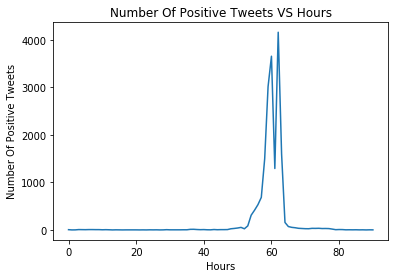

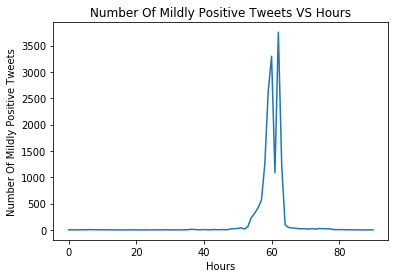

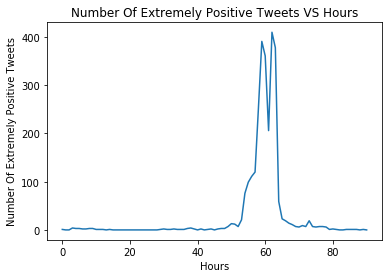

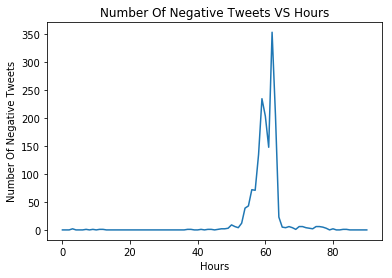

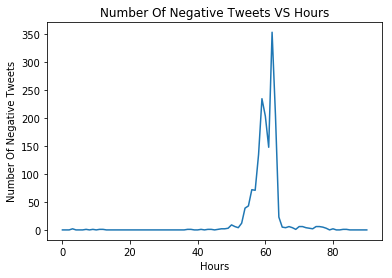

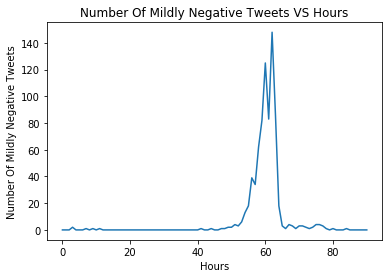

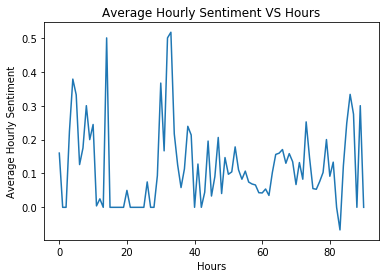

RMSE is: 3.34927355282
                            OLS Regression Results                            
Dep. Variable:           target_value   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     197.8
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           4.48e-48
Time:                        00:12:56   Log-Likelihood:                -239.12
No. Observations:                  91   AIC:                             546.2
Df Residuals:                      57   BIC:                             631.6
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

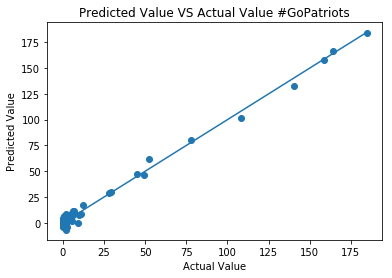

In [99]:
get_data_and_do_everything('#GoPatriots')

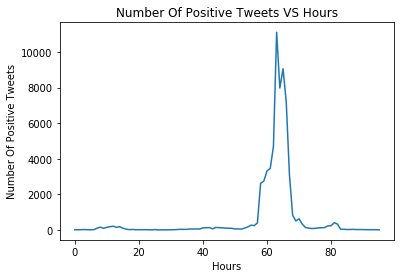

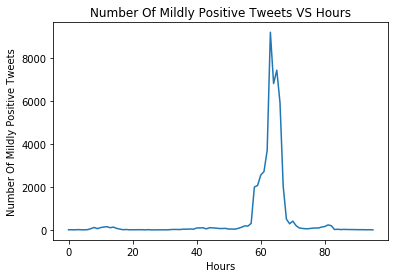

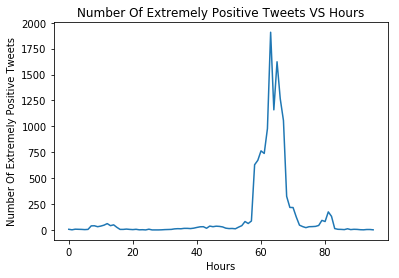

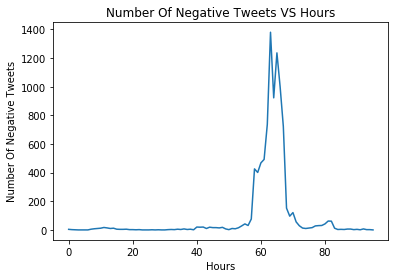

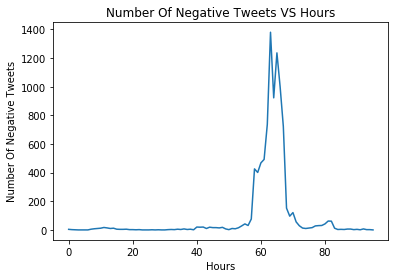

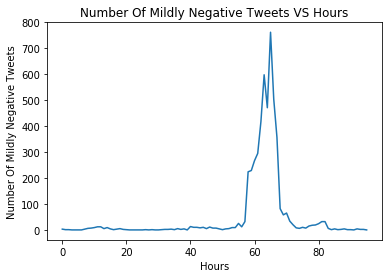

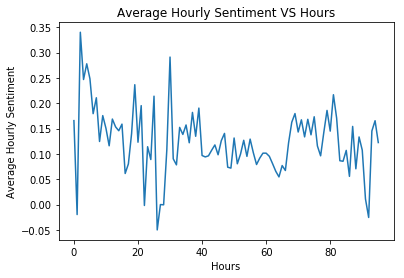

RMSE is: 25.809305557
                            OLS Regression Results                            
Dep. Variable:           target_value   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     68.18
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           1.12e-37
Time:                        00:18:59   Log-Likelihood:                -448.29
No. Observations:                  96   AIC:                             964.6
Df Residuals:                      62   BIC:                             1052.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

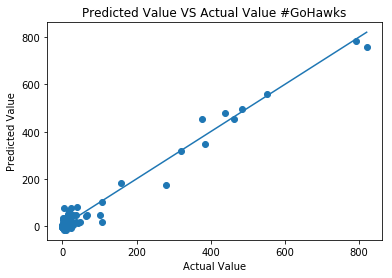

In [100]:
get_data_and_do_everything('#GoHawks')

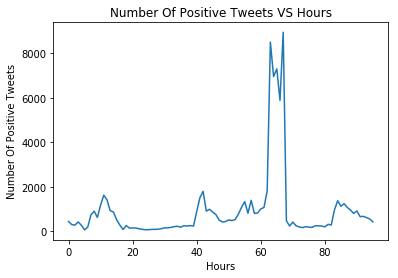

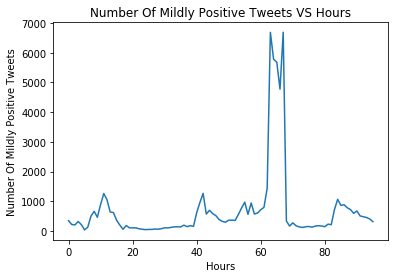

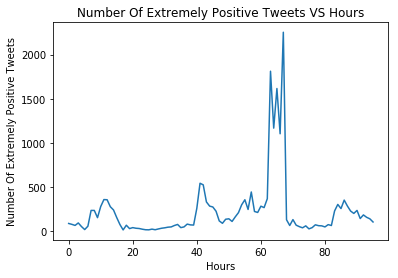

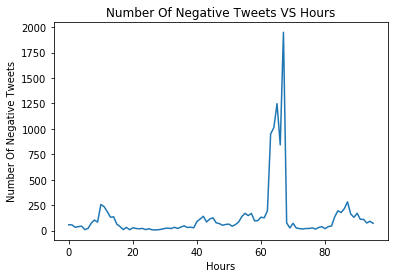

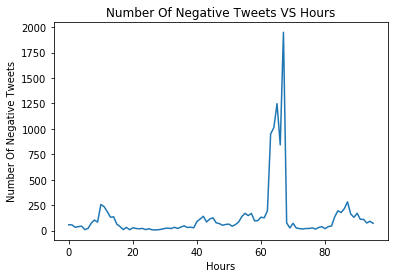

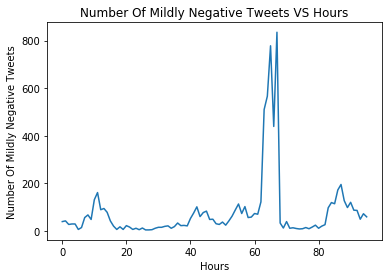

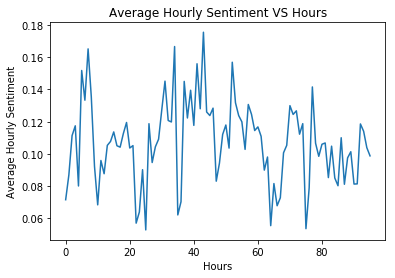

RMSE is: 69.7758636106
                            OLS Regression Results                            
Dep. Variable:           target_value   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     6.760
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           6.55e-11
Time:                        00:24:46   Log-Likelihood:                -543.77
No. Observations:                  96   AIC:                             1156.
Df Residuals:                      62   BIC:                             1243.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

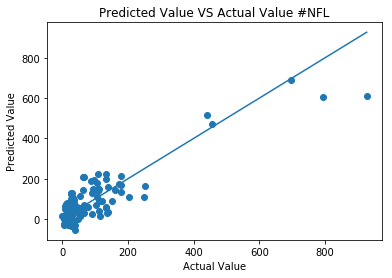

In [101]:
get_data_and_do_everything('#NFL')

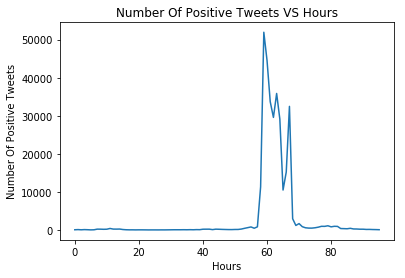

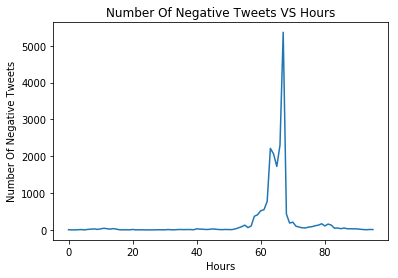

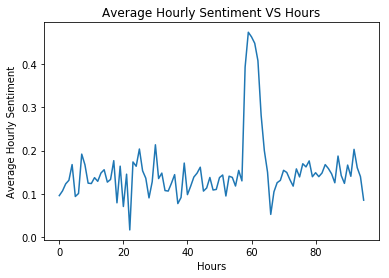

RMSE is: 1757.11968344
                            OLS Regression Results                            
Dep. Variable:           target_value   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     7.695
Date:                Wed, 14 Mar 2018   Prob (F-statistic):           4.03e-12
Time:                        23:37:40   Log-Likelihood:                -853.48
No. Observations:                  96   AIC:                             1775.
Df Residuals:                      62   BIC:                             1862.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

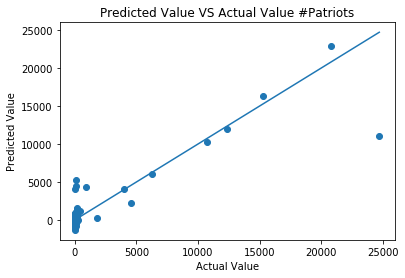

In [94]:
get_data_and_do_everything('#Patriots')

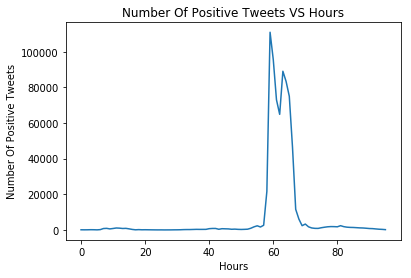

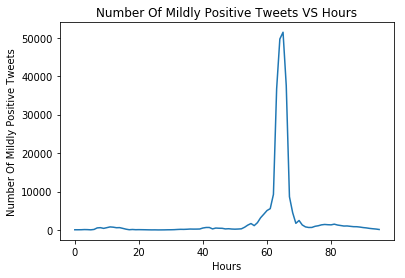

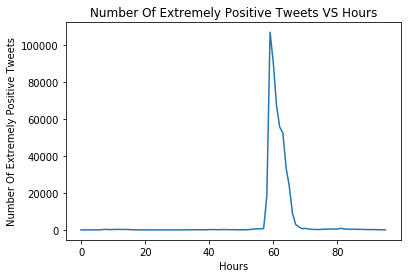

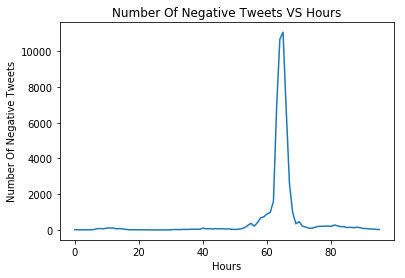

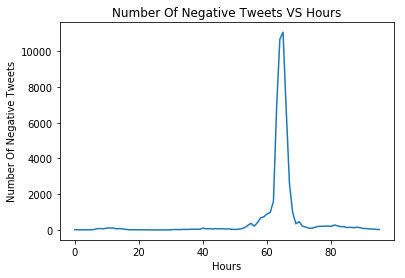

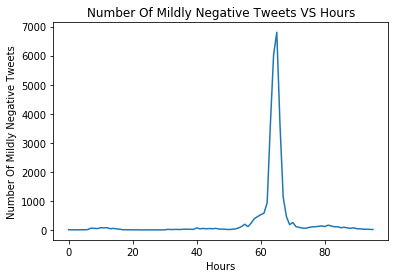

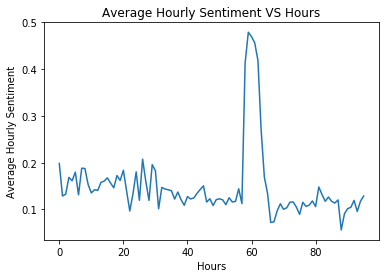

RMSE is: 3730.22507321
                            OLS Regression Results                            
Dep. Variable:           target_value   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     8.525
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           4.07e-13
Time:                        00:35:08   Log-Likelihood:                -925.74
No. Observations:                  96   AIC:                             1919.
Df Residuals:                      62   BIC:                             2007.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

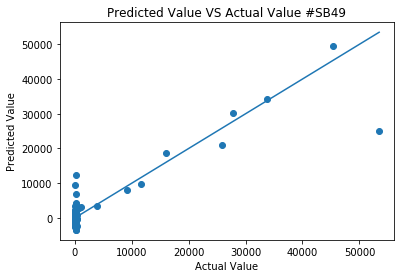

In [102]:
get_data_and_do_everything('#SB49')

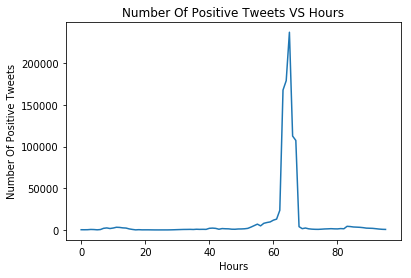

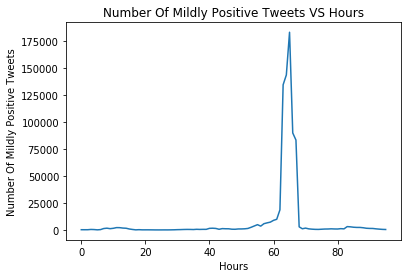

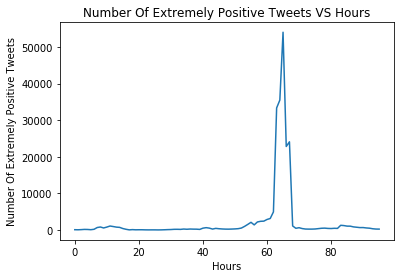

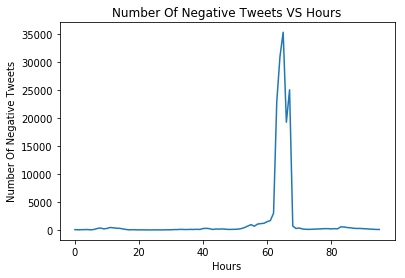

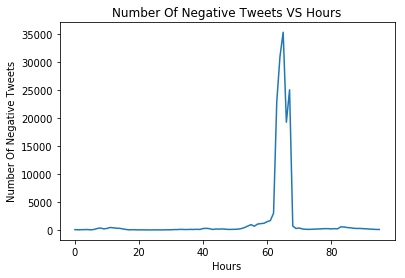

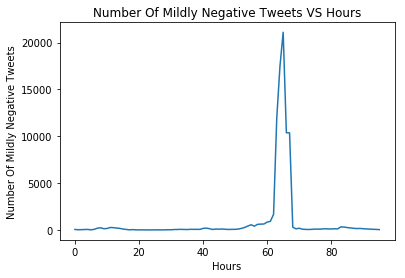

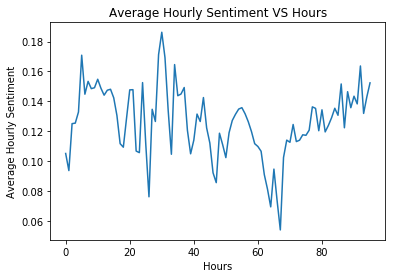

RMSE is: 893.755820648
                            OLS Regression Results                            
Dep. Variable:           target_value   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     26.92
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           5.69e-26
Time:                        00:53:27   Log-Likelihood:                -788.58
No. Observations:                  96   AIC:                             1645.
Df Residuals:                      62   BIC:                             1732.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

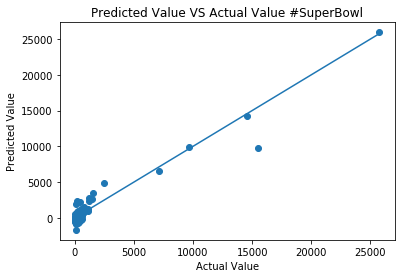

In [103]:
get_data_and_do_everything('#SuperBowl')